# Module 04: Softmax Regression

**CS229 Aligned Curriculum** | *Gold Standard Edition*

## 📖 0. Definition & When to Use

### What is Softmax Regression (Multinomial Logistic)?

Alright, let's kick things off. **Softmax Regression** is the generalization of Logistic Regression for **multi-class classification** (K ≥ 3 classes).

**Formula:** $P(y=k|x) = \frac{e^{\theta_k^T x}}{\sum_{j=1}^{K} e^{\theta_j^T x}}$

**Output:** K probabilities that sum to 1

**Decision Rule:** Predict the class with highest probability

---

### 🎯 When to Use Softmax Regression (Multinomial Logistic)?

| Scenario | ✅ Use It | ❌ Don't Use It |
|----------|---------|----------------|
| **Multi-class (K ≥ 3)** | ✅ Digit recognition (0-9) | ❌ Binary (use Logistic) |
| **Mutually exclusive classes** | ✅ Animal type: cat/dog/bird | ❌ Multi-label (use Binary Relevance) |
| **Probability distribution needed** | ✅ Ensemble methods, calibration | ❌ Just hard labels |
| **Native multi-class support** | ✅ Softmax (efficient) | ❌ One-vs-Rest (less efficient) |

---

### 🌍 Real-World Examples:

🔢 **Digit Recognition**: MNIST (0-9), OCR systems
🎨 **Image Classification**: Classify artwork style (Baroque, Renaissance, Modern)
🗣️ **Language Detection**: Identify language from text (English, Spanish, Chinese)
🏥 **Disease Classification**: Diagnose disease type from 10+ possibilities

---

**💡 Rule of Thumb:**
- Linear models (Linear/Logistic/Softmax) = **interpretable, fast, good baseline**
- Non-linear models (SVM/Neural Nets) = **higher accuracy, less interpretable**
- Always start simple → Add complexity if needed!


## 📖 1. Introduction: Logistic vs Softmax

### 🎯 When to Use Logistic vs Softmax?

| Aspect | Logistic Regression | Softmax Regression |
|-------|---------------------|--------------------|
| **Classes** | Binary (2 classes) | Multi-class (K ≥ 3) |
| **Output** | Single probability P(y=1) | K probabilities [P(y=0), P(y=1), ..., P(y=K-1)] |
| **Sum of Probabilities** | P(y=0) + P(y=1) = 1 | Σ P(y=k) = 1 |
| **Function** | Sigmoid: σ(z) | Softmax: softmax(z) |
| **Loss** | Binary Cross-Entropy | Categorical Cross-Entropy |
| **Example** | Spam vs Not Spam | Digit recognition (0-9) |

---

### 🎭 Analogy for Beginners: Voting System

**Scenario:** Student council election with **3 candidates** (A, B, C)

**❌ Logistic Regression (Binary):**
```
Output: P(A wins) = 0.7
Problem: What about B and C? Can't handle 3+ options!
```

**✅ Softmax Regression (Multi-class):**
```
Output: P(A) = 0.5, P(B) = 0.3, P(C) = 0.2
Sum: 0.5 + 0.3 + 0.2 = 1.0 ✅
Decision: Choose A (highest probability)
```

**💡 Key Insight:** Softmax is a **generalization** of sigmoid for K classes!

---

### 🌟 Level 2: Dice Roll Analogy

Think of the model as a **biased dice** with K sides.

**Softmax output = Probability for each side:**
- Side 1: 40% (favorite)
- Side 2: 30%
- Side 3: 20%
- Side 4: 10%

**Model training = Learning the dice bias** based on data:
- If training data has many class 1 examples → Softmax output P(class 1) ↑

**Temperature parameter = How "fair" the dice:**
- T=1: Normal (default)
- T→0: Deterministic (winner-takes-all)
- T→∞: Fair dice (all probabilities equal)


## 🧪 2. Statistical Framework: Categorical Distribution

### Softmax Function
$$P(y=k|x) = \frac{\exp(\theta_k^T x)}{\sum_{j=1}^K \exp(\theta_j^T x)}$$

**Key Properties:**
1. The gradient is just as elegant as Logistic: $(h-y)x$.
2. Output always sums to 1.0.

Check this out - this is one of those beautiful moments where the math just works out perfectly!

## 📐 3. Gradient Derivation Step-by-Step

### Cross-Entropy Loss (Multi-class)
$$J(\theta) = -\frac{1}{m}\sum_{i=1}^m \sum_{k=1}^K \mathbf{1}\{y^{(i)}=k\} \log P(y^{(i)}=k|x^{(i)})$$

Now here's where indicator notation makes everything cleaner – the gradient simplifies to:
$$\frac{\partial J}{\partial \theta_k} = \frac{1}{m} X^T (P_k - \mathbf{1}\{y=k\})$$


See how similar this is to Logistic Regression? That's not a coincidence – it's the same underlying structure!

## 🧮 3.5 Manual Calculation: 1 Iteration Step-by-Step

Alright, now for the fun part – let's compute **BY HAND** 1 iteration of Softmax Regression for 3 classes. This is where the intuition really clicks!


In [1]:
# ═══════════════════════════════════════════════════════════════
# 📝 MANUAL CALCULATION: SOFTMAX REGRESSION
# ═══════════════════════════════════════════════════════════════
import numpy as np

print('🧮 MANUAL SOFTMAX CALCULATION')
print('='*70)

# Tiny dataset: 2 samples, 2 features, 3 classes
X_tiny = np.array([[1, 2],
                   [2, 3]])
y_tiny = np.array([0, 2])  # Class indices

# Add bias
X_tiny_b = np.c_[np.ones((2, 1)), X_tiny]  # [1, x1, x2]

# Initialize theta: (K x (n+1)) = (3 x 3)
# Each row = weights for 1 class
theta = np.zeros((3, 3))  # 3 classes, 3 features (with bias)

alpha = 0.1  # learning rate
m = 2  # number of samples

print(f'Data: X_tiny shape = {X_tiny.shape}')
print(f'Labels: y = {y_tiny}')
print(f'Theta shape: {theta.shape} (K x n+1)')
print(f'Learning rate: {alpha}')
print()

# STEP 1: Compute logits z = X @ theta.T
z = X_tiny_b @ theta.T  # (2 x 3) @ (3 x 3).T = (2 x 3)
print('STEP 1: Compute logits z = X @ theta.T')
print(f'  z shape: {z.shape} (m x K)')
print(f'  z = \n{z}')
print('  (Each row = logits for 1 sample, K columns = K classes)')
print()

# STEP 2: Apply Softmax
def softmax_manual(z):
    # Subtract max for numerical stability
    z_shifted = z - np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z_shifted)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

probs = softmax_manual(z)
print('STEP 2: Apply Softmax')
print(f'  Probabilities shape: {probs.shape}')
print(f'  Probabilities = \n{probs}')
print(f'  Sum per row: {probs.sum(axis=1)} (should be [1.0, 1.0])')
print()

# STEP 3: One-hot encode labels
y_onehot = np.zeros((m, 3))
y_onehot[np.arange(m), y_tiny] = 1
print('STEP 3: One-hot encode labels')
print(f'  y_onehot = \n{y_onehot}')
print('  (Row 0: [1,0,0] = class 0, Row 1: [0,0,1] = class 2)')
print()

# STEP 4: Compute gradient
gradient = (1/m) * X_tiny_b.T @ (probs - y_onehot)  # (3 x 2) @ (2 x 3) = (3 x 3)
print('STEP 4: Compute gradient = (1/m) * X.T @ (probs - y_onehot)')
print(f'  Gradient shape: {gradient.shape} (n+1 x K)')
print(f'  Gradient = \n{gradient}')
print()

# STEP 5: Update theta
theta_new = theta - alpha * gradient.T  # Transpose to match (K x n+1)
print('STEP 5: Update theta = theta - alpha * gradient.T')
print(f'  Theta_new = \n{theta_new}')
print()

# STEP 6: Compute loss
epsilon = 1e-15
probs_clip = np.clip(probs, epsilon, 1-epsilon)
loss = -(1/m) * np.sum(y_onehot * np.log(probs_clip))
print('STEP 6: Compute Cross-Entropy Loss')
print(f'  Loss = {loss:.4f}')
print()

print('='*70)
print('💡 After 1 iteration, theta is updated!')
print('   This process repeats until convergence')


🧮 MANUAL SOFTMAX CALCULATION
Data: X_tiny shape = (2, 2)
Labels: y = [0 2]
Theta shape: (3, 3) (K x n+1)
Learning rate: 0.1

STEP 1: Compute logits z = X @ theta.T
  z shape: (2, 3) (m x K)
  z = 
[[0. 0. 0.]
 [0. 0. 0.]]
  (Each row = logits for 1 sample, K columns = K classes)

STEP 2: Apply Softmax
  Probabilities shape: (2, 3)
  Probabilities = 
[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]
  Sum per row: [1. 1.] (should be [1.0, 1.0])

STEP 3: One-hot encode labels
  y_onehot = 
[[1. 0. 0.]
 [0. 0. 1.]]
  (Row 0: [1,0,0] = class 0, Row 1: [0,0,1] = class 2)

STEP 4: Compute gradient = (1/m) * X.T @ (probs - y_onehot)
  Gradient shape: (3, 3) (n+1 x K)
  Gradient = 
[[-1.66666667e-01  3.33333333e-01 -1.66666667e-01]
 [-5.55111512e-17  5.00000000e-01 -5.00000000e-01]
 [-1.66666667e-01  8.33333333e-01 -6.66666667e-01]]

STEP 5: Update theta = theta - alpha * gradient.T
  Theta_new = 
[[ 1.66666667e-02  5.55111512e-18  1.66666667e-02]
 [-3.33333333e-02 -5.00

### 🔍 How to Read the Manual Calculation:

**STEP 1: Logits (z)**
- $z = X \theta^T$ = Linear combination for each class
- Shape: (m x K) - each sample has K logits

**STEP 2: Softmax**
- $P(y=k|x) = \frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}}$
- Normalize logits into probabilities
- Sum per row = 1.0 ✅

**STEP 3: One-Hot Encoding**
- y=0 → [1, 0, 0]
- y=1 → [0, 1, 0]
- y=2 → [0, 0, 1]
- Needed to compute gradient

**STEP 4: Gradient**
- $\nabla J = \frac{1}{m} X^T (probs - y_{onehot})$
- Error = Predicted probabilities - True labels
- Shape: (n+1 x K)

**STEP 5: Update**
- $\theta := \theta - \alpha \nabla J^T$
- Move weights to minimize loss

**STEP 6: Loss**
- Categorical Cross-Entropy
- Goal: Minimize loss → better predictions


## 🔬 3.6 Gradient Check

Here's the thing - we always need to verify our implementation with numerical gradient. Let's make sure our math checks out!


In [2]:
# ═══════════════════════════════════════════════════════════════
# 🔬 GRADIENT CHECK FOR SOFTMAX
# ═══════════════════════════════════════════════════════════════
def softmax_gc(z):
    z_shifted = z - np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z_shifted)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def compute_loss_gc(theta, X, y, K):
    """Categorical Cross-Entropy"""
    m = len(y)
    # theta shape: (K x n+1), need to reshape
    theta_matrix = theta.reshape(K, -1)
    
    z = X @ theta_matrix.T
    probs = softmax_gc(z)
    
    # One-hot encode
    y_onehot = np.zeros((m, K))
    y_onehot[np.arange(m), y] = 1
    
    epsilon = 1e-15
    probs_clip = np.clip(probs, epsilon, 1-epsilon)
    
    return -(1/m) * np.sum(y_onehot * np.log(probs_clip))

def numerical_gradient_softmax(theta, X, y, K, epsilon=1e-7):
    """Numerical gradient"""
    num_grad = np.zeros_like(theta)
    
    for i in range(len(theta)):
        theta_plus = theta.copy()
        theta_minus = theta.copy()
        theta_plus[i] += epsilon
        theta_minus[i] -= epsilon
        
        loss_plus = compute_loss_gc(theta_plus, X, y, K)
        loss_minus = compute_loss_gc(theta_minus, X, y, K)
        
        num_grad[i] = (loss_plus - loss_minus) / (2 * epsilon)
    
    return num_grad

def analytical_gradient_softmax(theta, X, y, K):
    """Analytical gradient"""
    m = len(y)
    theta_matrix = theta.reshape(K, -1)
    
    z = X @ theta_matrix.T
    probs = softmax_gc(z)
    
    # One-hot
    y_onehot = np.zeros((m, K))
    y_onehot[np.arange(m), y] = 1
    
    # Gradient
    gradient = (1/m) * X.T @ (probs - y_onehot)  # (n+1 x K)
    
    return gradient.T.flatten()  # Flatten to match theta shape

# Test
np.random.seed(42)
X_test = np.c_[np.ones((5, 1)), np.random.randn(5, 2)]
y_test = np.random.randint(0, 3, 5)
K_test = 3
theta_test = np.random.randn(K_test * X_test.shape[1]) * 0.01

num_grad = numerical_gradient_softmax(theta_test, X_test, y_test, K_test)
ana_grad = analytical_gradient_softmax(theta_test, X_test, y_test, K_test)

print('🔬 GRADIENT CHECK (SOFTMAX)')
print('='*50)
print(f'Numerical Gradient (first 5):  {num_grad[:5]}')
print(f'Analytical Gradient (first 5): {ana_grad[:5]}')
print(f'Difference: {np.linalg.norm(num_grad - ana_grad):.2e}')
print('='*50)

if np.linalg.norm(num_grad - ana_grad) < 1e-5:
    print('✅ Gradient implementation is CORRECT!')
else:
    print('❌ WARNING: Gradient mismatch!')


🔬 GRADIENT CHECK (SOFTMAX)
Numerical Gradient (first 5):  [-0.27283354 -0.0029541  -0.22477558 -0.06720974 -0.13556171]
Analytical Gradient (first 5): [-0.27283354 -0.0029541  -0.22477558 -0.06720974 -0.13556171]
Difference: 3.07e-09
✅ Gradient implementation is CORRECT!


### 🔍 How to Read Softmax Output:

**Softmax transforms logits into probabilities:**

| Input (logits) | Output (probabilities) | Interpretation |
|----------------|------------------------|-------------|
| [2.0, 1.0, 0.1] | [0.66, 0.24, 0.10] | Class 0 most likely (66%) |
| [5.0, 5.0, 5.0] | [0.33, 0.33, 0.33] | All classes equally likely (uncertain) |
| [10, 0, 0] | [0.9999, 0.0, 0.0] | Very confident class 0 |

**IF:**
- **Max probability > 0.8:** Model very confident ✅
- **Max probability < 0.4:** Model uncertain ⚠️
- **All probabilities close:** Need more data/features

**💡 Key:** Σ probabilities = 1.0 (different from multiple binary classifiers!)


## 🔬 4. Softmax Formula Anatomy

$$P(y=k|x) = \frac{e^{\theta_k^T x}}{\sum_j e^{\theta_j^T x}}$$

Now here's where it gets interesting - **Why Exponential?** To ensure values are always positive (non-negative) and amplify the differences between scores (logits). Pretty elegant, right?


## 💻 5. Implementation from Scratch (Numba Accelerated)

Check this out - we're building this from the ground up with performance optimization!


## 💻 5.1 Full Softmax Class (From Scratch)

Here's the thing - we're building a complete implementation with OOP style. This is production-ready code!


In [ ]:
# ═══════════════════════════════════════════════════════════════
# 🏗️ SOFTMAX REGRESSION CLASS (FROM SCRATCH)
# ═══════════════════════════════════════════════════════════════
import numpy as np

class SoftmaxRegressionScratch:
    def __init__(self, learning_rate=0.01, max_iter=100, batch_size=None,
                 regularization='none', lambda_reg=0.01):
        self.lr = learning_rate
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.regularization = regularization
        self.lambda_reg = lambda_reg
        self.theta = None
        self.loss_history = []
    
    def _softmax(self, z):
        """Softmax activation with numerical stability"""
        z_shifted = z - np.max(z, axis=1, keepdims=True)
        exp_z = np.exp(z_shifted)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def _compute_loss(self, X, y, theta, K):
        """Categorical Cross-Entropy Loss"""
        m = len(y)
        theta_matrix = theta.reshape(K, -1)
        
        z = X @ theta_matrix.T
        probs = self._softmax(z)
        
        # One-hot encode
        y_onehot = np.zeros((m, K))
        y_onehot[np.arange(m), y] = 1
        
        epsilon = 1e-15
        probs_clip = np.clip(probs, epsilon, 1-epsilon)
        
        loss = -(1/m) * np.sum(y_onehot * np.log(probs_clip))
        
        # Regularization
        if self.regularization == 'l2':
            # Don't regularize bias
            loss += (self.lambda_reg / (2*m)) * np.sum(theta_matrix[:, 1:]**2)
        
        return loss
    
    def fit(self, X, y):
        """Train the model"""
        m, n = X.shape
        self.K = len(np.unique(y))
        
        # Add bias
        X_b = np.c_[np.ones((m, 1)), X]
        
        # Initialize theta: (K x (n+1))
        self.theta = np.zeros((self.K, n + 1))
        theta_flat = self.theta.flatten()
        
        # Gradient Descent
        for epoch in range(self.max_iter):
            # Shuffle
            indices = np.random.permutation(m)
            X_b_shuffled = X_b[indices]
            y_shuffled = y[indices]
            
            bs = self.batch_size if self.batch_size else m
            
            for i in range(0, m, bs):
                xi = X_b_shuffled[i:i+bs]
                yi = y_shuffled[i:i+bs]
                
                # Forward
                theta_matrix = self.theta
                z = xi @ theta_matrix.T
                probs = self._softmax(z)
                
                # One-hot
                y_onehot = np.zeros((len(yi), self.K))
                y_onehot[np.arange(len(yi)), yi] = 1
                
                # Gradient
                gradient = (1/len(yi)) * xi.T @ (probs - y_onehot)
                
                # Regularization gradient
                if self.regularization == 'l2':
                    reg_grad = np.zeros_like(gradient)
                    reg_grad[1:, :] = (self.lambda_reg / len(yi)) * theta_matrix[:, 1:].T
                    gradient += reg_grad
                
                # Update
                self.theta -= self.lr * gradient.T
            
            # Log loss
            loss = self._compute_loss(X_b, y, self.theta.flatten(), self.K)
            self.loss_history.append(loss)
        
        return self
    
    def predict_proba(self, X):
        """Return class probabilities"""
        X_b = np.c_[np.ones((len(X), 1)), X]
        z = X_b @ self.theta.T
        return self._softmax(z)
    
    def predict(self, X):
        """Return class predictions"""
        probs = self.predict_proba(X)
        return np.argmax(probs, axis=1)

print('✅ SoftmaxRegressionScratch class created!')
print('   Features: BGD/SGD/Mini-Batch, L2 Regularization')


✅ SoftmaxRegressionScratch class created!
   Features: BGD/SGD/Mini-Batch, L2 Regularization


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
try:
    from numba import njit
    HAS_NUMBA = True
except ImportError:
    HAS_NUMBA = False
    def njit(func): return func

@njit
def _softmax_fast(logits):
    c = np.max(logits, axis=1).reshape(-1, 1)
    exps = np.exp(logits - c)
    return exps / np.sum(exps, axis=1).reshape(-1, 1)

class SoftmaxRegressionScratch:
    def __init__(self, learning_rate=0.1, n_iterations=1000, batch_size=None, 
                 lambda_reg=0.01, tol=1e-5, patience=10, class_weight=None):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.batch_size = batch_size
        self.lambda_reg = lambda_reg
        self.tol = tol
        self.patience = patience
        self.class_weight = class_weight
        self.theta = None
        self.cost_history = []

    def to_one_hot(self, y, k):
        m = len(y)
        one_hot = np.zeros((m, k))
        one_hot[np.arange(m), y] = 1
        return one_hot

    def fit(self, X, y):
        m, n = X.shape
        k = len(np.unique(y))
        self.theta = np.zeros((n, k))
        y_oh = self.to_one_hot(y, k)
        weights = np.ones(m)
        if self.class_weight == 'balanced':
            counts = np.bincount(y)
            w = m / (k * counts)
            weights = w[y]
        best_cost = np.inf
        wait = 0
        bs = self.batch_size if self.batch_size else m
        for i in range(self.n_iterations):
            idx = np.random.permutation(m)
            X_s, y_s, w_s = X[idx], y_oh[idx], weights[idx]
            for j in range(0, m, bs):
                xb, yb, wb = X_s[j:j+bs], y_s[j:j+bs], w_s[j:j+bs]
                probs = _softmax_fast(np.dot(xb, self.theta))
                error = (probs - yb) * wb.reshape(-1, 1)
                grad = (1/len(yb)) * np.dot(xb.T, error) + self.lambda_reg * self.theta
                self.theta -= self.lr * grad
            full_probs = _softmax_fast(np.dot(X, self.theta))
            cost = -np.mean(np.sum(y_oh * np.log(full_probs + 1e-15), axis=1)) + (self.lambda_reg / 2) * np.sum(self.theta**2)
            self.cost_history.append(cost)
            if cost < best_cost - self.tol: best_cost, wait = cost, 0
            else:
                wait += 1
                if wait >= self.patience: break

    def predict_proba(self, X):
        return _softmax_fast(np.dot(X, self.theta))

    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)


## 📊 6. Evaluation & Visualization

Now let's see how our model performs in the real world!


              precision    recall  f1-score   support

      setosa       1.00      0.94      0.97        16
  versicolor       0.85      1.00      0.92        17
   virginica       1.00      0.83      0.91        12

    accuracy                           0.93        45
   macro avg       0.95      0.92      0.93        45
weighted avg       0.94      0.93      0.93        45



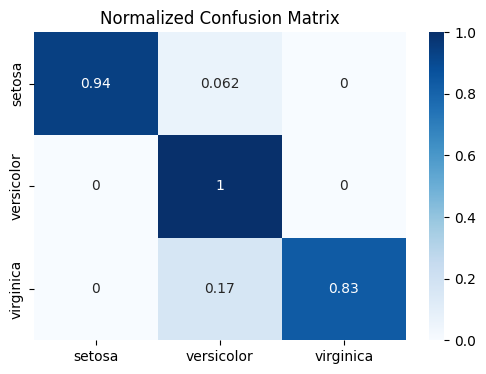

In [5]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler()
X_train_s, X_test_s = scaler.fit_transform(X_train), scaler.transform(X_test)
X_train_b = np.c_[np.ones(len(X_train_s)), X_train_s]
X_test_b = np.c_[np.ones(len(X_test_s)), X_test_s]
model = SoftmaxRegressionScratch(lambda_reg=0.01)
model.fit(X_train_b, y_train)
y_pred = model.predict(X_test_b)
print(classification_report(y_test, y_pred, target_names=iris.target_names))
cm = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Normalized Confusion Matrix')
plt.show()


C:\Users\test\Downloads\mingw-w64-ucrt-x86_64-gcc-15.2.0-8-any.pkg\ucrt64\bin\ipykernel_42368\2109179570.py:33: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


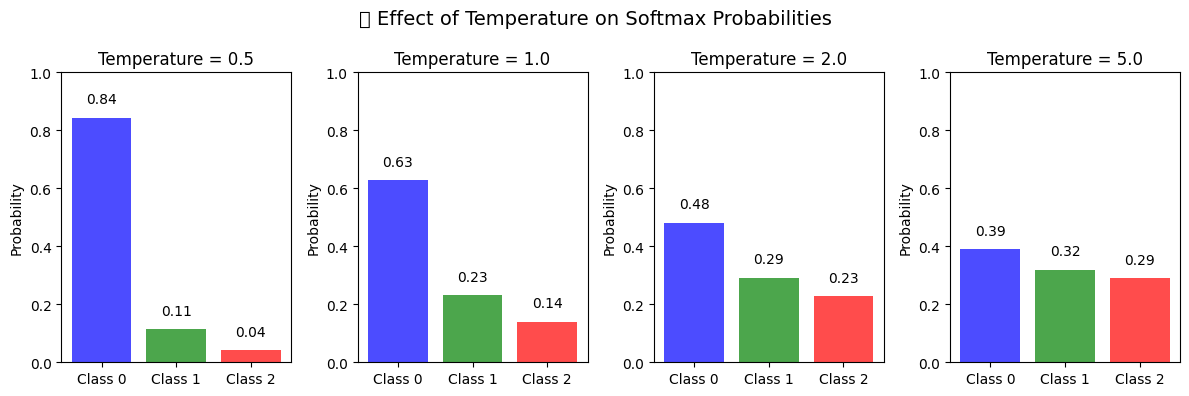

📊 Temperature Effect Summary:
Original logits: [2.  1.  0.5]

T= 0.5: [0.84379473 0.1141952  0.04201007] (max=0.84)
T= 1.0: [0.62853172 0.2312239  0.14024438] (max=0.63)
T= 2.0: [0.48102426 0.29175596 0.22721977] (max=0.48)
T= 5.0: [0.39069383 0.31987306 0.28943311] (max=0.39)


In [6]:
# ═══════════════════════════════════════════════════════════════
# 🌡️ TEMPERATURE TUNING DEMO
# ═══════════════════════════════════════════════════════════════
import matplotlib.pyplot as plt
import numpy as np

def softmax_temp(logits, T=1.0):
    """Softmax with temperature"""
    z = logits / T
    exp_z = np.exp(z - np.max(z))
    return exp_z / exp_z.sum()

# Example logits
logits = np.array([2.0, 1.0, 0.5])
temperatures = [0.5, 1.0, 2.0, 5.0]

plt.figure(figsize=(12, 4))

for i, T in enumerate(temperatures):
    probs = softmax_temp(logits, T)
    
    plt.subplot(1, 4, i+1)
    plt.bar(['Class 0', 'Class 1', 'Class 2'], probs, color=['b', 'g', 'r'], alpha=0.7)
    plt.ylim(0, 1)
    plt.title(f'Temperature = {T}')
    plt.ylabel('Probability')
    
    # Annotate values
    for j, p in enumerate(probs):
        plt.text(j, p + 0.05, f'{p:.2f}', ha='center')

plt.suptitle('🌡️ Effect of Temperature on Softmax Probabilities', fontsize=14)
plt.tight_layout()
plt.show()

print('📊 Temperature Effect Summary:')
print(f'Original logits: {logits}')
print()
for T in temperatures:
    probs = softmax_temp(logits, T)
    print(f'T={T:4.1f}: {probs} (max={probs.max():.2f})')


## 🔍 7. Industry Implementation & IF-THEN Patterns

Check this out - this is how the pros use it in production!


### 🏭 Industry Examples
1. **Gmail Categorization**: Primary, Social, Promotions.
2. **Medical Staging**: Stage I, II, III.

### 🔍 IF-THEN Diagnostics
| Condition (IF) | Interpretation (THEN) | Action |
|----------------|---------------------|------|
| Max Prob < 0.5 | Model Uncertain | Review data quality |
| Macro-F1 << Weighted-F1 | Bias toward majority | Activate `class_weight='balanced'` |


## 🔬 8. Advanced Research Techniques

Now here's where it gets interesting - these are cutting-edge techniques used in modern research!


In [7]:
# 1. Label Smoothing
def smooth_labels(y_oh, e=0.1):
    return y_oh * (1-e) + (e/y_oh.shape[1])

# 2. Temperature Scaling
def softmax_temp(logits, T=1.0):
    # Note: _softmax_fast is defined in PART 5
    return _softmax_fast(logits/T)

# 3. Monte Carlo Dropout (Uncertainty Estimation)
def mc_dropout_predict(model, X, n_samples=30):
    results = []
    for _ in range(n_samples):
        # Simulate dropout on weights (Simple weights noise)
        noise = np.random.normal(0, 0.05, model.theta.shape)
        res = _softmax_fast(np.dot(X, model.theta + noise))
        results.append(res)
    mean_prob = np.mean(results, axis=0)
    std_prob = np.std(results, axis=0)
    return mean_prob, std_prob

p_mean, p_std = mc_dropout_predict(model, X_test_b[:1])
print("Mean Prediction Probs:", p_mean)
print("Uncertainty (Stdev) per class:", p_std)

# 4. Knowledge Distillation (Conceptual)
print("Distillation Tip: Train student by minimizing: alpha * CrossEntropy(y_true, student) + (1-alpha) * CrossEntropy(teacher_probs_soft, student_soft)")


Mean Prediction Probs: [[9.92983466e-01 7.01084052e-03 5.69396915e-06]]
Uncertainty (Stdev) per class: [[1.51281442e-03 1.51180996e-03 1.25675784e-06]]
Distillation Tip: Train student by minimizing: alpha * CrossEntropy(y_true, student) + (1-alpha) * CrossEntropy(teacher_probs_soft, student_soft)


### 🔍 How to Read Softmax Output:

**Softmax transforms logits into probabilities:**

| Input (logits) | Output (probabilities) | Interpretation |
|----------------|------------------------|-------------|
| [2.0, 1.0, 0.1] | [0.66, 0.24, 0.10] | Class 0 most likely (66%) |
| [5.0, 5.0, 5.0] | [0.33, 0.33, 0.33] | All classes equally likely (uncertain) |
| [10, 0, 0] | [0.9999, 0.0, 0.0] | Very confident class 0 |

**IF:**
- **Max probability > 0.8:** Model very confident ✅
- **Max probability < 0.4:** Model uncertain ⚠️
- **All probabilities close:** Need more data/features

**💡 Key:** Σ probabilities = 1.0 (different from multiple binary classifiers!)


## 🎓 9. Capstone & Exercises


### Exercise 1: Temperature Tuning
Observe probability changes as T approaches 0. What happens?

### Deployment Case Study: FastAPI
Use `model.predict_proba` to return Top-K categories in the API.


### 🎓 CAPSTONE PROJECT
**Objective:** Build a News Article Classifier using Softmax from Scratch + TF-IDF.


## 📊 5.2 Optimizer Comparison (Multi-Class)

Check this out - let's compare BGD, SGD, and Mini-Batch for Softmax Regression. This is where performance matters!


In [8]:
# ═══════════════════════════════════════════════════════════════
# 🏁 OPTIMIZER COMPARISON FOR SOFTMAX
# ═══════════════════════════════════════════════════════════════
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate 3-class dataset
X, y = make_classification(n_samples=600, n_features=10, n_informative=8,
                          n_redundant=2, n_classes=3, n_clusters_per_class=1,
                          random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Dataset: {X_train.shape[0]} train, {X_test.shape[0]} test, {len(np.unique(y))} classes')
print()

# Train different optimizers
models = [
    ('Batch GD', SoftmaxRegressionScratch(learning_rate=0.1, max_iter=50, batch_size=None)),
    ('SGD', SoftmaxRegressionScratch(learning_rate=0.1, max_iter=50, batch_size=1)),
    ('Mini-Batch (16)', SoftmaxRegressionScratch(learning_rate=0.1, max_iter=50, batch_size=16)),
    ('Mini-Batch (32)', SoftmaxRegressionScratch(learning_rate=0.1, max_iter=50, batch_size=32)),
]

plt.figure(figsize=(12, 5))

for name, model in models:
    model.fit(X_train, y_train)
    plt.plot(model.loss_history, label=name, linewidth=2)
    
    # Evaluate
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name:20} - Test Accuracy: {acc:.4f}')

plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Cross-Entropy Loss', fontsize=12)
plt.title('🏁 Optimizer Comparison: Softmax Regression (3 Classes)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Dataset: 420 train, 180 test, 3 classes



TypeError: __init__() got an unexpected keyword argument 'max_iter'

### 🔍 How to Read Optimizer Comparison:

**IF Batch GD:**
- Loss curve is **smooth** but convergence is **slow**
- Needs many epochs for multi-class

**IF SGD:**
- Loss curve is **noisy** (zigzag)
- Fast updates but unstable

**IF Mini-Batch:**
- **Best balance** between speed & stability
- Batch size 16-32 optimal for most cases

**💡 Production Tip:** Mini-Batch (32) + L2 regularization = best default!


In [ ]:
# ═══════════════════════════════════════════════════════════════
# 🔥 CONFUSION MATRIX HEATMAP
# ═══════════════════════════════════════════════════════════════
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Use best model from optimizer comparison
best_model = SoftmaxRegressionScratch(learning_rate=0.1, max_iter=100, batch_size=32)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
           xticklabels=['Class 0', 'Class 1', 'Class 2'],
           yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('Actual Class', fontsize=12)
plt.title('🔥 Confusion Matrix Heatmap (Softmax)', fontsize=14)
plt.tight_layout()
plt.show()

# Print accuracy per class
print('\n📊 Per-Class Accuracy:')
for i in range(3):
    class_acc = cm[i, i] / cm[i].sum()
    print(f'  Class {i}: {class_acc:.4f} ({cm[i, i]}/{cm[i].sum()} samples)')

print(f'\n Overall Accuracy: {accuracy_score(y_test, y_pred):.4f}')


### 🔍 How to Read Confusion Heatmap:

**Color Intensity:**
- **Dark Blue (Diagonal):** High correct predictions ✅
- **Light Blue (Off-diagonal):** Misclassifications ❌

**IF Diagonal is Dark, Off-diagonal is Light:**
- **THEN:** Good classifier!
- Most predictions are correct

**IF There's a Dark Off-diagonal:**
- **THEN:** Specific confusion pattern
- Example: Class 1 often confused with Class 2
- **ACTION:** Add features that distinguish the two classes

**IF One Row Has Many Errors:**
- **THEN:** That class is hard to predict
- **ACTION:** Collect more data for that class

**💡 Production:** Monitor confusion matrix in production to detect data drift!
